In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('./dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [4]:
corrDf = df.corr()
highCorr = corrDf['SalePrice']>0.5
#every feature has a column of sale price for its correlation with that; see which ones have high corr

corrDf[highCorr].loc[:,'SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [5]:
dfT = df[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

In [6]:
dfT.sort_values('SalePrice', ascending=False).head(20)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
691,755000,10,4316,3,832,2444,2444,3,10,1994,1995
1182,745000,10,4476,3,813,2396,2411,3,10,1996,1996
1169,625000,10,3627,3,807,1930,1831,3,10,1995,1996
898,611657,9,2364,3,820,2330,2364,2,11,2009,2010
803,582933,9,2822,3,1020,1734,1734,3,12,2008,2009
1046,556581,9,2868,3,716,1992,1992,3,11,2005,2006
440,555000,10,2402,3,672,3094,2402,2,10,2008,2008
769,538000,8,3279,3,841,1650,1690,3,12,2003,2003
178,501837,9,2234,3,1166,2216,2234,2,9,2008,2009
798,485000,9,3140,3,820,1926,1966,3,11,2008,2009


In [7]:
dfT.isnull().sum().sort_values(ascending=False)

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_all = dfT.drop('SalePrice', axis=1) #axis=1 because target col
y_all = dfT['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state = 100)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=100)

In [10]:
y_pred = dtr.predict(X_test).reshape(-1,1)


In [11]:
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

35496.56733008388

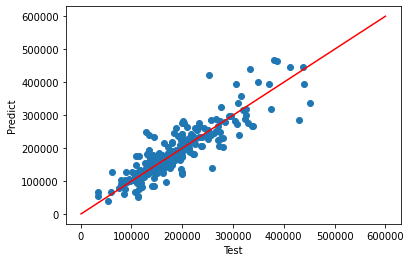

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predict')

x_ref = np.linspace(1000,600000,2) 
y_ref = x_ref
plt.plot(x_ref, y_ref, color="red")
plt.show()

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
print(y_train)
print('*'*50)
print(y_train.ravel())
rfr.fit(X_train, y_train.ravel())


[[143900]
 [ 68500]
 [315750]
 ...
 [ 40000]
 [213500]
 [163000]]
**************************************************
[143900  68500 315750 ...  40000 213500 163000]


RandomForestRegressor(random_state=0)

In [14]:
y_pred_2 = rfr.predict(X_test).reshape(-1,1)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))

27072.500317544134

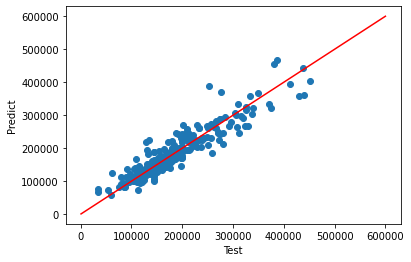

In [15]:
plt.scatter(y_test, y_pred_2)
plt.xlabel('Test')
plt.ylabel('Predict')

x_ref = np.linspace(1000,600000,2) 
y_ref = x_ref
plt.plot(x_ref, y_ref, color="red")
plt.show()